# 3 Prepare Geographic Vector Data to Display

## 3.1 Software Requirements

In [66]:
import geopandas as geopd # handling shapefile
import matplotlib.pyplot as plt

In addition to these modules, you will likely need to install `descartes` module by `pip install descartes` to use geometric objects with matplotlib.

## 3.2 How to Handle Shapefiles

To handle shapefiles in python, you can use a library called `geopandas`. `read_file()` function of this library reads a shapefile as a `GeoDataFrame` object which is a `pandas.DataFrame` with a geometry column containing vector information.

Operations such as deleting rows and merging with other data frames are the same as for `pandas.DataFrame`. Thus you can manipulate shapefiles just as easily as with normal data frames in pandas.

In [67]:
filename = "./maps/cb_2018_us_state_500k.shp"
sf_us = geopd.read_file(filename)

In [68]:
type(sf_us)

geopandas.geodataframe.GeoDataFrame

We can check what kind of CRS this object is using by `.crs` attribute.

In [69]:
sf_us.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

We can see that this object looks exactly like a `pandas.DataFrame` by printing. 

In [70]:
sf_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


`geometry` column itself is an object called `GeoSeries`. A `GeoDataFrame` can be thought of as a `DataFrame` that holds a `GeoSeries` inside.

## 3.3 How to Draw a US Map

We can easily draw state boundaries recorded as multi polygons in the `geometry` column using [`.plot()`](https://geopandas.org/reference.html#geopandas.GeoDataFrame.plot)

<AxesSubplot:>

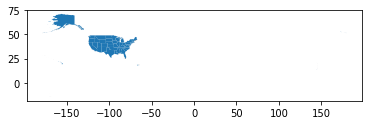

In [71]:
sf_us.plot()

In [72]:
dropstates = ["Alaska",
              "Hawaii",
              "Puerto Rico",
              "Guam",
              "United States Virgin Islands",
              "Commonwealth of the Northern Mariana Islands",
              "American Samoa"]

<AxesSubplot:>

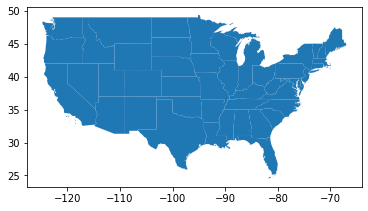

In [73]:
sf_us.query('NAME not in @dropstates').plot()

There are many [geometric manipulations available in geopandas](https://geopandas.org/geometric_manipulations.html), including affine transformation by a matrix A, and shift, scale, or rotate by a certain latitude and longitude value.

Note that these operations are available for `GeoSeries`, and that the resulting output is only the `geometry` columns of the original `GeoDataFrame`. Therefore, after these operations, you need to overwrite the existing `geometry` column with the new `GeoSeries`. This can be achieved by using `.set_geometry()` in `GeoDataFrame`.

First, we shift all the latitude 180 degrees to the right (east) to move Alaska off the date line by using `.translate()`. 

<AxesSubplot:>

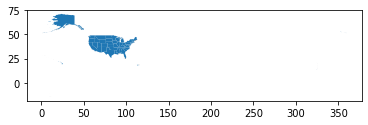

In [74]:
sf_us_360 = sf_us.translate(xoff=180, yoff=0) # shift GeoSeries
sf_us_360 = sf_us.set_geometry(sf_us_360) # Update geometry column
sf_us_360.plot()

Then we shift and scale Alaska and Hawaii.

In [82]:
sf_us_360.query('NAME == "Alaska"')

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
27,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((359.482 51.983, 359.487 51.984..."


# 4 Prepare Count Data to Display

## 4.1 Software Requirements

## 4.2 Merge COVID-19 Count with Geographic Data

# 5 Generate Choropleth Maps

## 5.1 Software Requirements

## 5.2 Show Choropleth Maps for each Quarter in 2020

# 6 Extended Example: Interactive Choropleth Maps

## 6.1 Software Requirements

## 6.2 Generate Interactive/Animated Choropleth Map